<a href="https://colab.research.google.com/github/staticspe/Taller/blob/main/EstadisticaComputarizadaTaller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
df = pd.read_csv("/content/winequality-red.csv",delimiter=';')

## Exploración y calidad de los datos

In [ ]:
# @title verificamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observamos que todos los datos son númericos

In [ ]:
# @title verificamos la cantidad de datos nulos
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Acá se puede apreciar que no se cuentan con datos nulos

In [ ]:
# @title valores unicos para  la columna calidad
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


## Estadisticas descriptivas

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualización

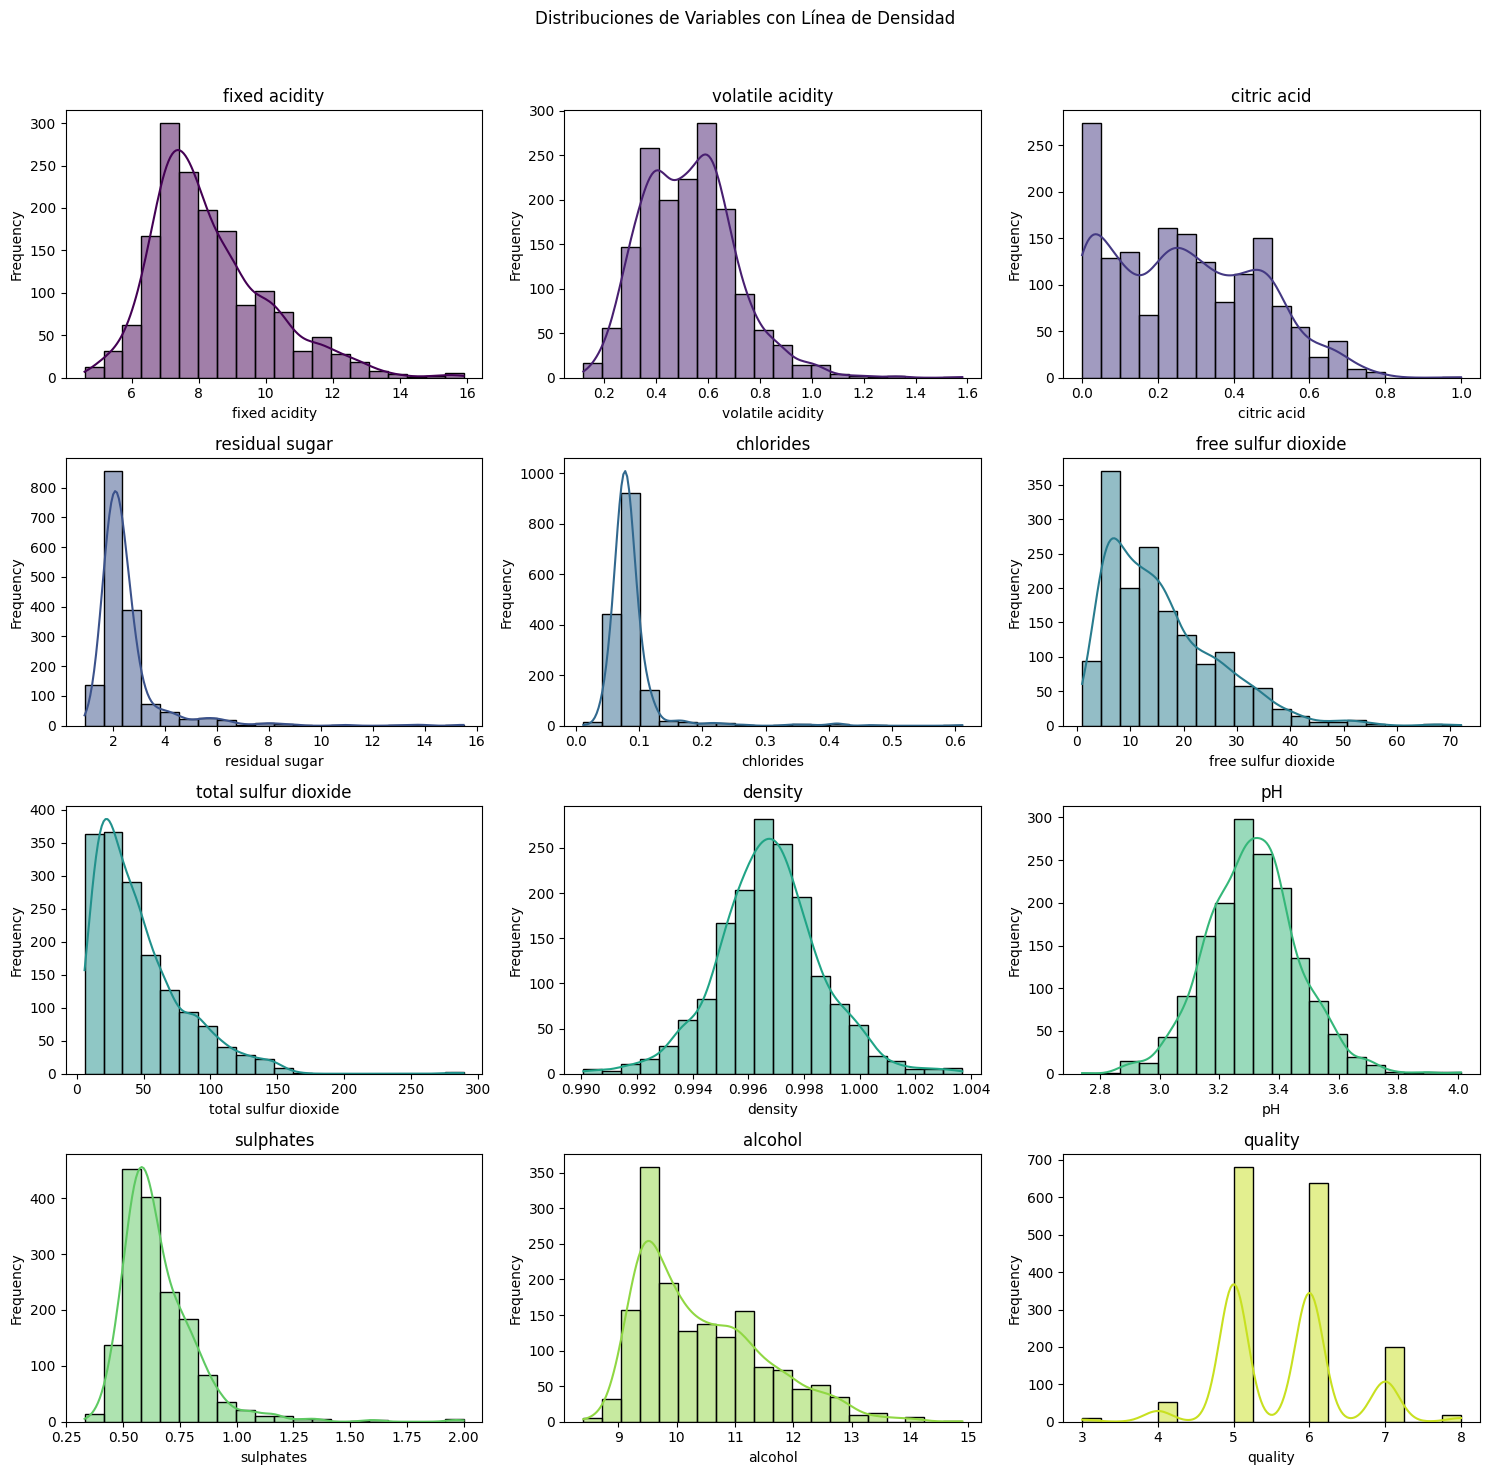

In [ ]:
# Generate histograms with density lines for each variable
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle("Distribuciones de Variables con Línea de Densidad")

# Color palette
color_palette = plt.cm.viridis

# Plotting histograms with density lines
for i, col in enumerate(df.columns):
    row, col_index = divmod(i, 3)
    sns.histplot(df[col], bins=20, color=color_palette(i / len(df.columns)), edgecolor='black', ax=axes[row, col_index], kde=True)
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Este análisis inicial muestra distribuciones normales en algunas características, como la densidad y el pH, mientras que otras, como la acidez volátil y acidez fija, presentan sesgos a la derecha.

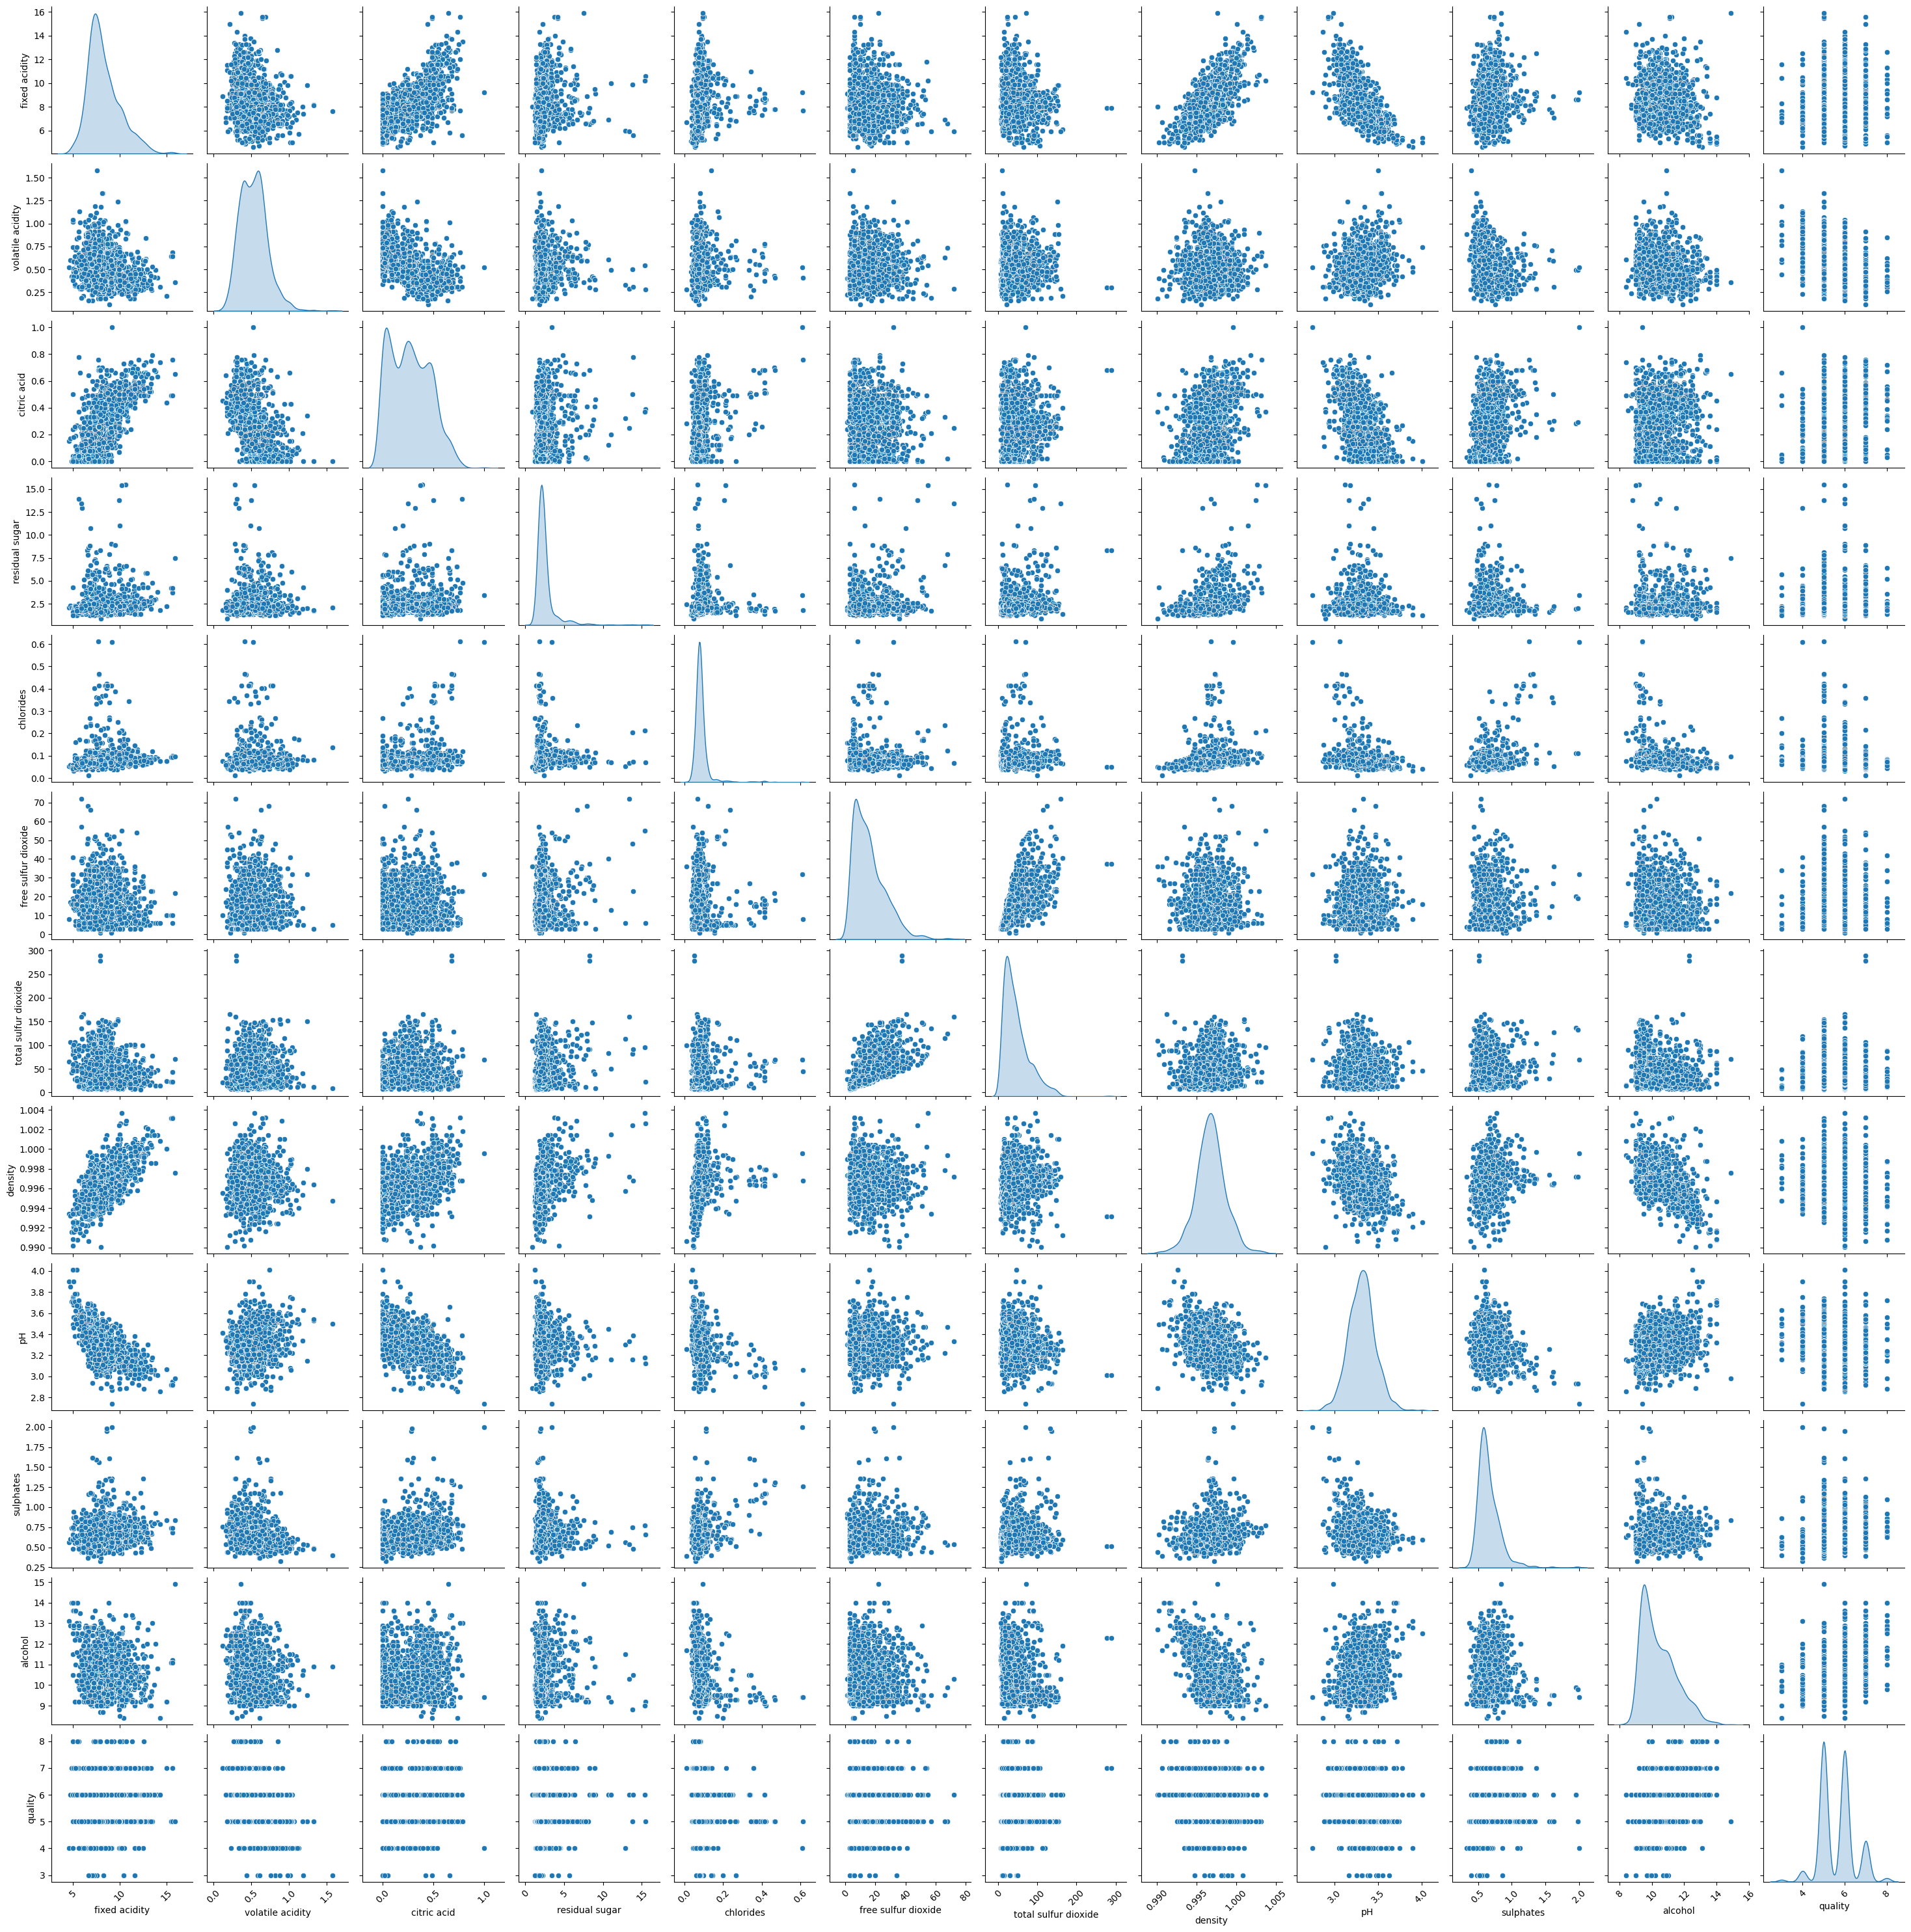

In [ ]:
g = sns.pairplot(df, diag_kind='kde')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

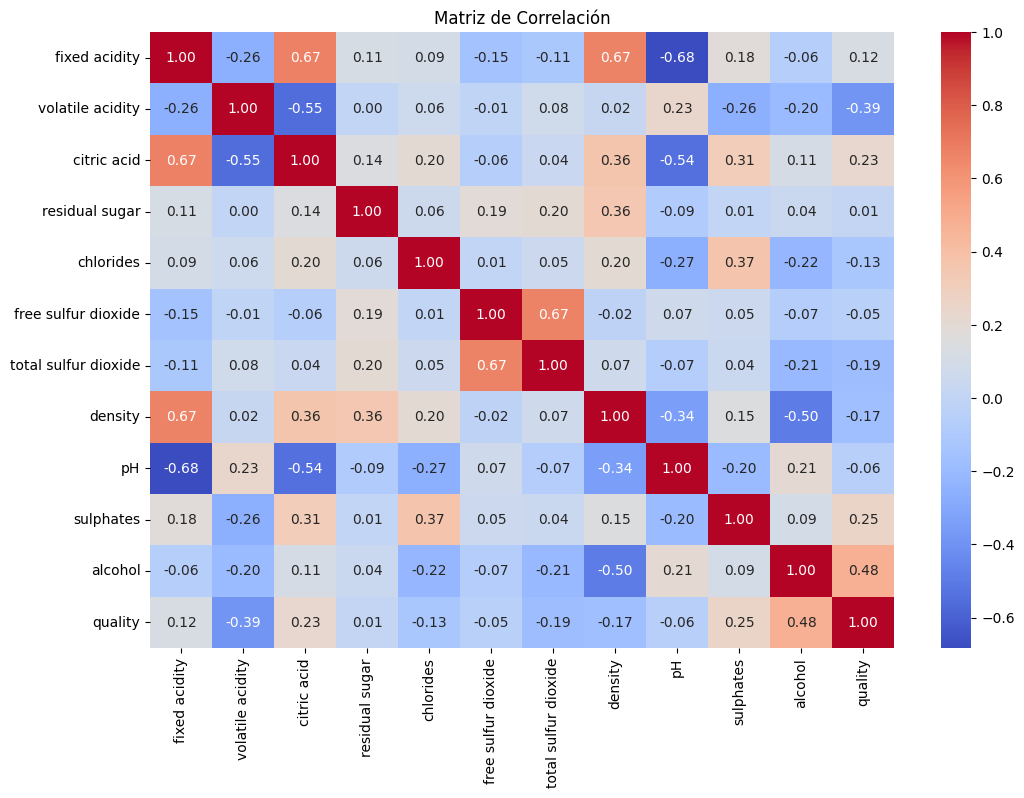

In [ ]:
# @title Matriz de correlación
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

- Se observan correlaciones moderadas entre **alcohol** y **quality** (positiva) y entre **volatile acidity** y **quality** (negativa), lo que sugiere que estos factores podrían influir significativamente en la calidad.
- Variables como **residual sugar** y **density** tienen correlaciones bajas con **quality**, indicando un impacto menor.

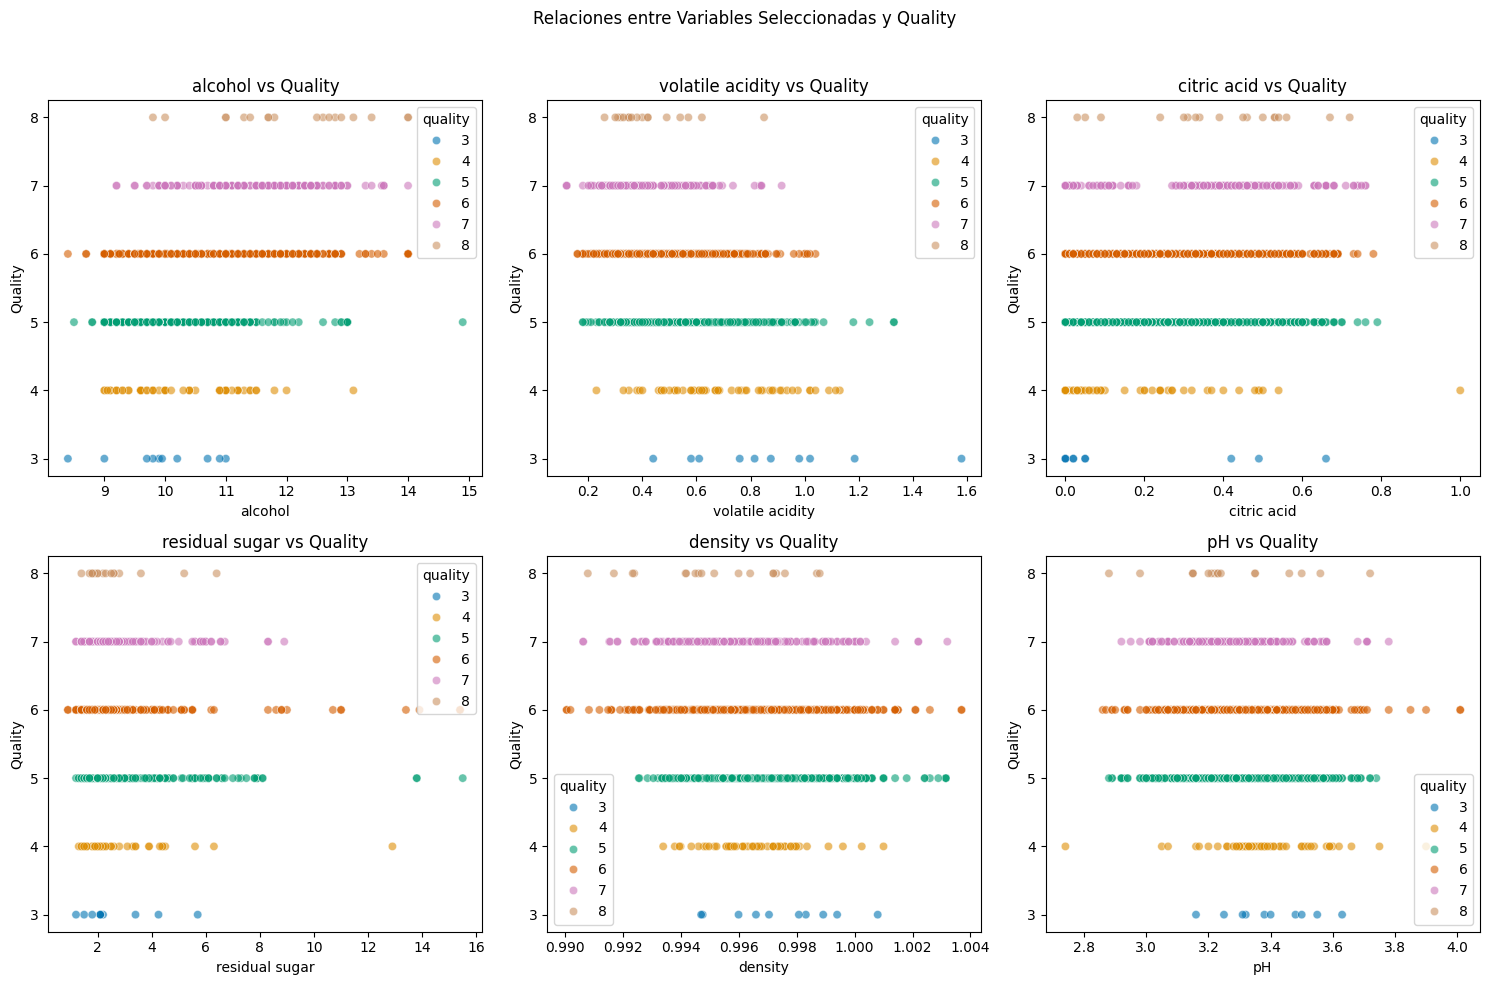

In [ ]:
selected_variables = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Relaciones entre Variables Seleccionadas y Quality")

for i, var in enumerate(selected_variables):
    row, col_index = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col_index], x=df[var], y=df['quality'],hue=df['quality'], alpha=0.6, palette='colorblind')
    axes[row, col_index].set_title(f"{var} vs Quality")
    axes[row, col_index].set_xlabel(var)
    axes[row, col_index].set_ylabel("Quality")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

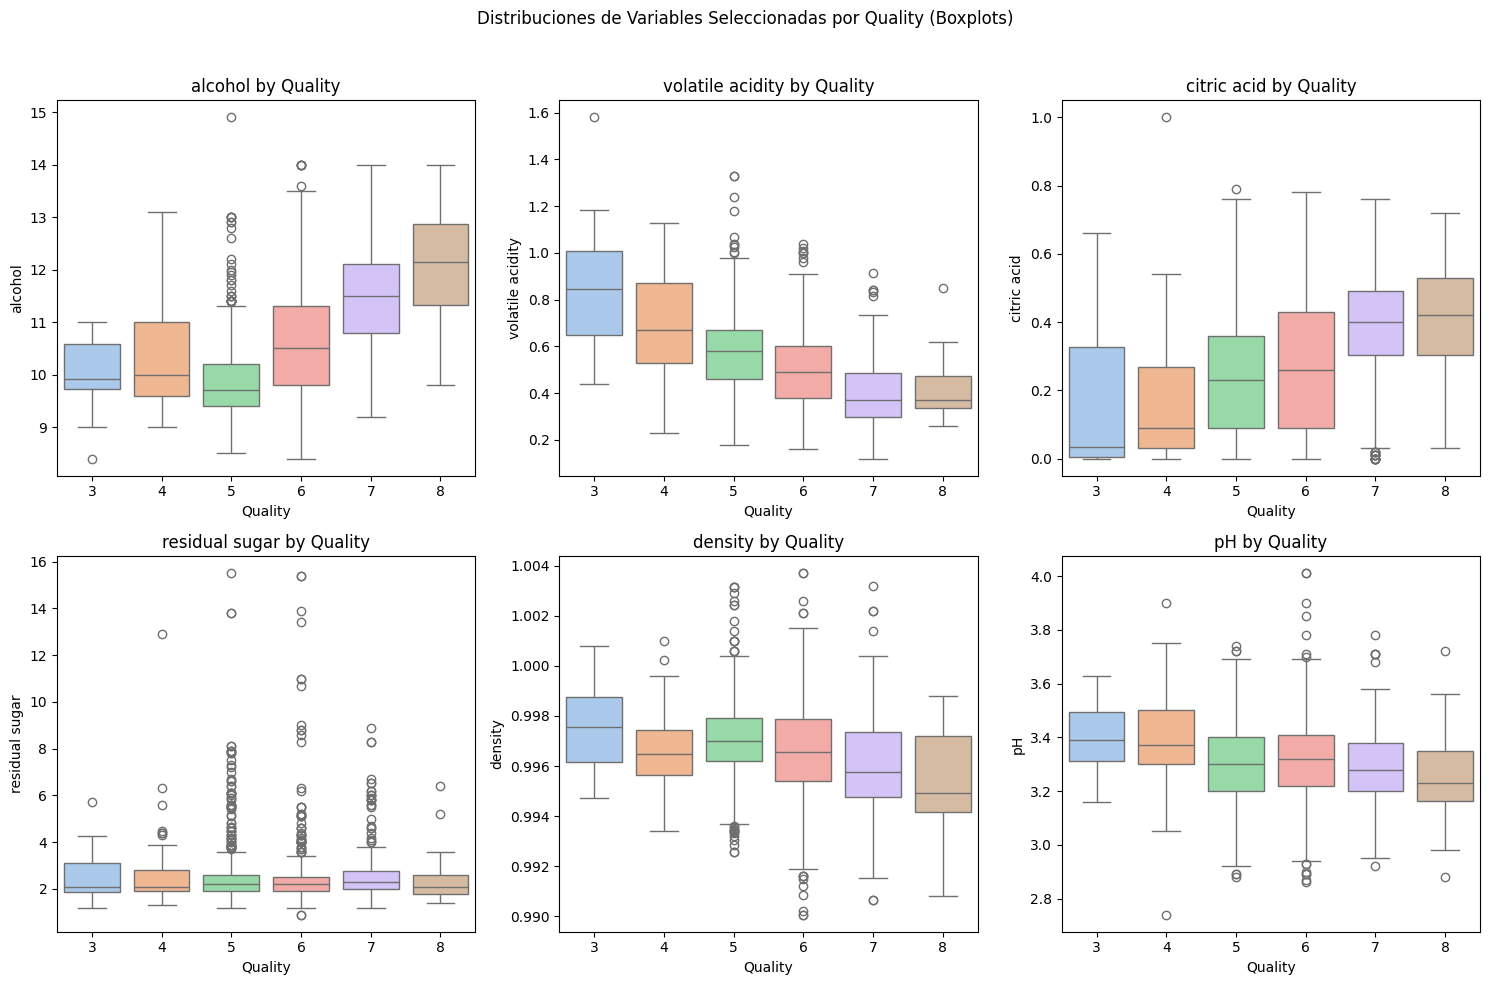

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribuciones de Variables Seleccionadas por Quality (Boxplots)")

for i, var in enumerate(selected_variables):
    row, col_index = divmod(i, 3)
    sns.boxplot(ax=axes[row, col_index], x=df['quality'], y=df[var], hue=df['quality'], palette='pastel',dodge=False)
    axes[row, col_index].set_title(f"{var} by Quality")
    axes[row, col_index].set_xlabel("Quality")
    axes[row, col_index].set_ylabel(var)
    axes[row, col_index].legend_.remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- **alcohol y acido citrio**: Los vinos de mayor calidad tienen medianas más altas en contenido de alcohol y acido citrico.
- **volatile acidity**: La mediana disminuye para calidades más altas, confirmando la relación negativa.
- **otras Variables**: citric acid, residual sugar, y pH muestran distribuciones similares para todas las calidades, lo que indica poca discriminación.

## Regresión Lineal

In [ ]:
# @title regresion lineal con todas las variables
y=df['quality']
x=df.drop('quality',axis=1)
reg = LinearRegression()
reg = reg.fit(x, y)
y_pred = reg.predict(x)

#Calculamos RMSE o sea el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y, y_pred))

#Calculamos la bondad de ajuste del modelo R^2
R_squared = r2_score(y, y_pred)

# calculamos los coeficientes de correlacion de Pearson
r = np.corrcoef(y, y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r ={r:.2f}")

El error cuadrático medio es RMSE = 0.6456
La bondad de ajuste o coeficiente de Determinación R^2: 36.06%
Coeficiente de correlación de Pearson es r =0.60


El modelo tiene un error promedio de predicción de 0.6456 en la calidad del vino (RMSE), lo que significa que las predicciones están razonablemente cerca de los valores reales en la escala utilizada. Sin embargo, el coeficiente de determinación \(R^2 = 36.06\%\) indica que solo se explica poco más del 36% de la variación en la calidad del vino, mostrando que el modelo no captura completamente las relaciones entre las variables. Además, la correlación \(r = 0.60\) refleja una relación positiva moderada entre las predicciones y los valores reales, lo que sugiere que el modelo detecta patrones generales, pero no es muy preciso. Estos resultados indican un modelo funcional, pero con margen significativo para mejoras.

In [ ]:
# @title regresion lineal con alcohol y acido citrico
reg = LinearRegression()
reg = reg.fit(df[['alcohol', 'citric acid']], y)
y_pred = reg.predict(df[['alcohol', 'citric acid']])

#Calculamos RMSE o sea el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y, y_pred))

#Calculamos la bondad de ajuste del modelo R^2
R_squared = r2_score(y, y_pred)

# calculamos los coeficientes de correlacion de Pearson
r = np.corrcoef(y, y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r ={r:.2f}")

El error cuadrático medio es RMSE = 0.6957
La bondad de ajuste o coeficiente de Determinación R^2: 25.74%
Coeficiente de correlación de Pearson es r =0.51


El nuevo modelo, que utiliza solo "alcohol" y "ácido cítrico" como predictores, tiene un error cuadrático medio (RMSE) de 0.6957, indicando que, en promedio, las predicciones se desvían en 0.6957 puntos de la calidad real. El coeficiente de determinación \(R^2 = 25.74\%\) muestra que este modelo explica solo el 25.74% de la variación en la calidad del vino, lo que significa que pierde una parte considerable de la información en comparación con el modelo anterior que usaba más variables. Además, el coeficiente de correlación de Pearson \(r = 0.51\) indica una correlación positiva moderada-baja entre las predicciones y los valores reales, reflejando un desempeño más limitado. Esto sugiere que, aunque estas dos variables aportan información relevante, no son suficientes por sí solas para modelar con precisión la calidad del vino.

## Regresión con las variables con mas correlación

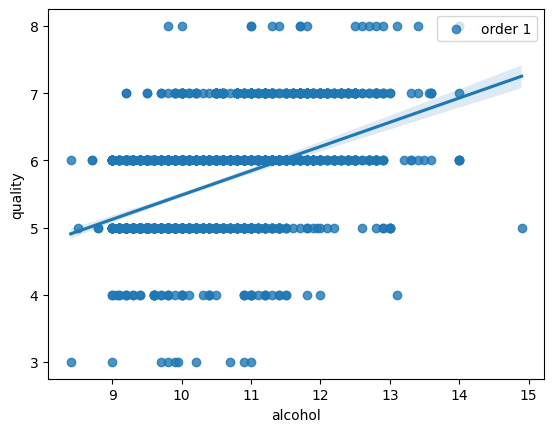

In [ ]:
sns.regplot(x=df['alcohol'], y=df['quality'], scatter=True, order=1, data=df, label="order 1")
plt.legend(loc="upper right")

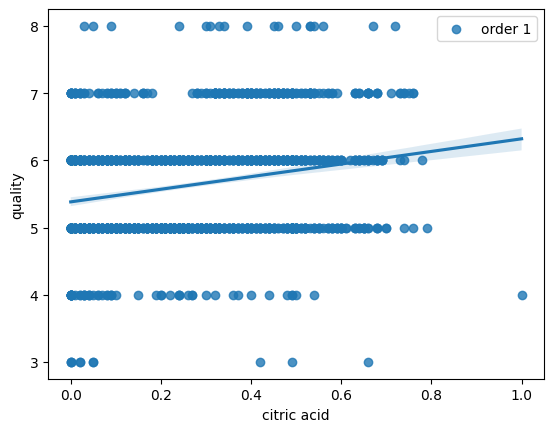

In [ ]:
sns.regplot(x=df['citric acid'], y=df['quality'], scatter=True, order=1, data=df, label="order 1")
plt.legend(loc="upper right")